In [1]:
import os  # 多GPU时 os设置GPU必须放置在最前面
os.environ['CUDA_VISIBLE_DEVICES'] = "3"
from fastai import *
from fastai.vision import *
from PIL import ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES = True

In [2]:
import torch
print(torch.cuda.is_available())

True


In [3]:
# 加载数据路径
# 路径下数据按train  val    test  划分三个问价夹中图片按类别划分文件夹。

path_1=Path('/Data/jing/black_river_classify_data/classify_day') #/home/create/jing/dataset/garbage_classify/    ../data/mnist_sample/
path_1.ls()

[PosixPath('/Data/jing/black_river_classify_data/classify_day/train'),
 PosixPath('/Data/jing/black_river_classify_data/classify_day/val'),
 PosixPath('/Data/jing/black_river_classify_data/classify_day/save224.npz'),
 PosixPath('/Data/jing/black_river_classify_data/classify_day/models')]

In [4]:
# 加载数据 bs 批量大小
import numpy as np
np.random.seed(42)
data_1 = ImageDataBunch.from_folder(path_1, train='train', valid='val', ds_tfms=get_transforms(), size=224,bs=64).normalize(imagenet_stats)

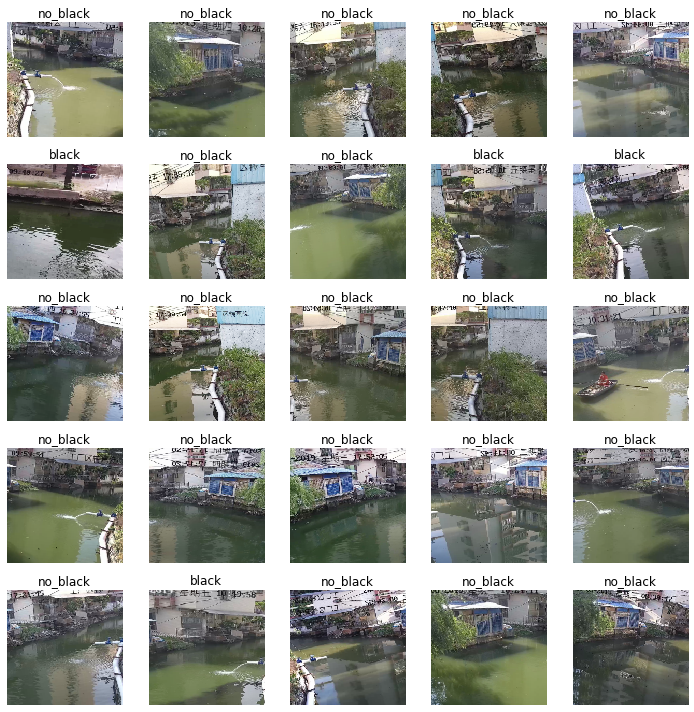

In [5]:
data_1.classes
data_1.show_batch(rows=5,figsize=(10,10))

In [6]:
data_1.classes,data_1.c,len(data_1.train_ds),len(data_1.valid_ds)

(['black', 'no_black'], 2, 15785, 8643)

In [7]:
learn = cnn_learner(data_1,models.resnet50,metrics=error_rate)

In [8]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.060948,0.936294,0.110725,02:57
1,0.012195,1.325264,0.107254,02:49
2,0.004071,1.364226,0.108759,02:49
3,0.003053,1.524687,0.109337,02:47


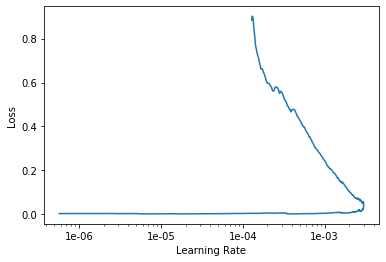

In [10]:
learn.recorder.plot()

In [11]:
learn.save('/home/create/jing/jing_vision/pth/classification/stage_resnet50')

In [15]:
learn.unfreeze()  # 恢复所有层都可以训练
learn.lr_find(start_lr=1e-7,end_lr=1)  # 学习率查找   start_lr=1e-6,end_lr=1


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


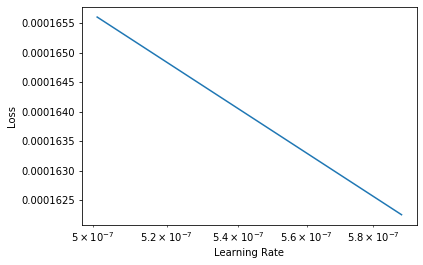

In [16]:
learn.recorder.plot()  #绘制学习率查找曲线

In [17]:
learn.load('/home/create/jing/jing_vision/pth/classification/stage_resnet50')

Learner(data=ImageDataBunch;

Train: LabelList (15785 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
black,black,black,black,black
Path: /Data/jing/black_river_classify_data/classify_day;

Valid: LabelList (8643 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
black,black,black,black,black
Path: /Data/jing/black_river_classify_data/classify_day;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): B

In [19]:
# 在最佳学习率范围使用循环学习率进行训练
learn.fit_one_cycle(50,max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.002275,1.370827,0.106560,03:20
1,0.001394,1.615494,0.106792,03:03
2,0.000526,1.590213,0.106097,02:51


KeyboardInterrupt: 

In [20]:
# 保存模型
learn.save('/home/create/jing/jing_vision/pth/classification/stage_resnet50_1')

In [21]:
# 绘制混淆矩阵
iterp = ClassificationInterpretation.from_learner(learn)


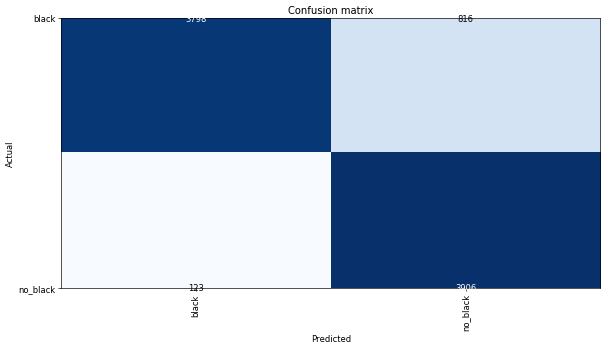

In [22]:
iterp.plot_confusion_matrix(figsize=(10,10),dpi=60)

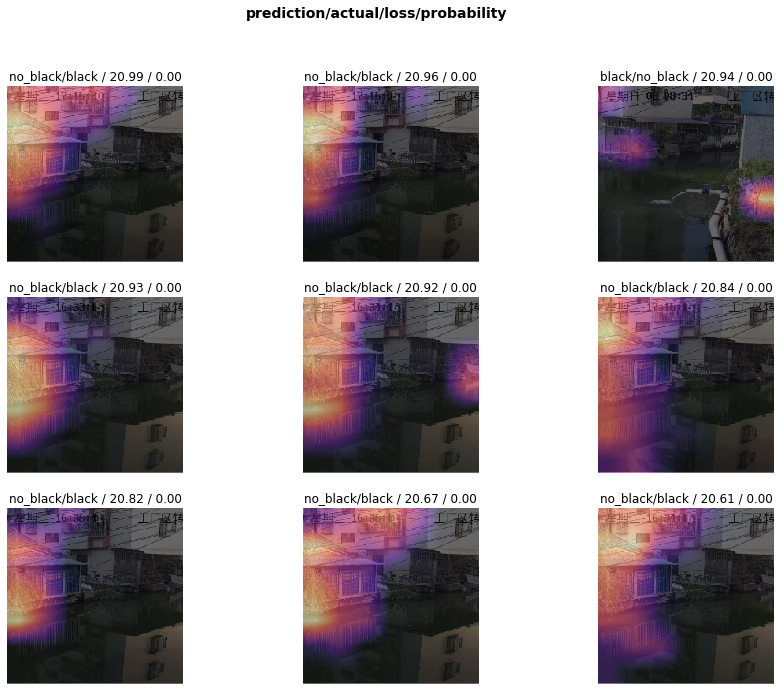

In [23]:
iterp.plot_top_losses(9,figsize=(15,11))

In [24]:
iterp.most_confused(min_val=2)

[('black', 'no_black', 816), ('no_black', 'black', 123)]

In [25]:
from fastai.widgets import *

In [27]:
losses,idxs = iterp.top_losses()
top_loss_path = data_1.valid_ds.x[idxs]

In [29]:
top_loss_path

ImageList (8643 items)
Image (3, 720, 1280),Image (3, 720, 1280),Image (3, 720, 1280),Image (3, 720, 1280),Image (3, 720, 1280)
Path: /Data/jing/black_river_classify_data/classify_day

In [32]:
ds, idxs = DatasetFormatter().from_toplosses(learn)

In [34]:
ImageCleaner(ds, idxs, path_1)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [31]:
ImageCleaner

fastai.widgets.image_cleaner.ImageCleaner

In [39]:
learn

Learner(data=ImageDataBunch;

Train: LabelList (15785 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
black,black,black,black,black
Path: /Data/jing/black_river_classify_data/classify_day;

Valid: LabelList (8643 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
black,black,black,black,black
Path: /Data/jing/black_river_classify_data/classify_day;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): B

In [ ]:
import fastai.widgets.image_cleaner as image_cleaner

In [ ]:
db = (ImageList.from_folder(path_1)
                   .split_none()
                   .label_from_folder()
                   .databunch())

In [ ]:
learn = cnn_learner(db, models.squeezenet1_1, metrics=[accuracy])
learn.load('/home/create/jing/jing_vision/pth/classification/stage_1')

In [ ]:
import fastai.widgets.DatasetFormatter as DatasetFormatter
ds, idxs = DatasetFormatter().from_toplosses(learn)

In [36]:
import torch

In [37]:
model = torch.load('/home/create/jing/jing_vision/pth/classification/stage_1.pth')

In [38]:
model

{'model': OrderedDict([('0.0.0.weight',
               tensor([[[[ 1.2082e-01,  1.7792e-01, -1.6163e-02],
                         [ 2.6984e-01,  3.3997e-01,  7.6684e-02],
                         [ 1.3520e-01,  1.5852e-01, -2.9889e-02]],
               
                        [[-3.1640e-01, -3.5259e-01, -2.3726e-01],
                         [-4.1028e-01, -4.3469e-01, -2.9293e-01],
                         [-3.4066e-01, -3.6401e-01, -2.3726e-01]],
               
                        [[ 1.6487e-01,  1.7110e-01,  2.4017e-01],
                         [ 1.5144e-01,  9.3182e-02,  1.9871e-01],
                         [ 2.4107e-01,  2.0132e-01,  2.8274e-01]]],
               
               
                       [[[ 3.4240e-01, -1.2470e-01,  3.7946e-02],
                         [-2.3492e-01,  5.5438e-02,  2.3842e-01],
                         [ 1.5988e-02,  8.4138e-02, -3.7798e-01]],
               
                        [[ 6.3890e-02, -4.0007e-01, -6.9937e-02],
                 